# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [11]:
import numpy as np

In [1]:
import pandas as pd

df = pd.read_csv('data/temps.csv')
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Trabaja las variables categóricas del dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [3]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [5]:
df['week'].nunique()

7

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['week_int'] = le.fit_transform(df['week'])
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5


In [7]:
df['week_int'].unique()

array([0, 2, 3, 1, 5, 6, 4])

In [8]:
pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


In [10]:
my_week = {
    "Mon":1,
    "Tues":2,
    "Wed":3,
    "Thurs":4,
    "Fri":5,
    "Sat":6,
    "Sun":7
}

df['week_int'] = df['week'].replace(my_week)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2


In [13]:
df['autumn'] = np.where(df['month'].isin([10,11,12]), 1, 0)
df['winter'] = np.where(df['month'].isin([1,2,3]), 1, 0)
df['spring'] = np.where(df['month'].isin([4,5,6]), 1, 0)
df['summer'] = np.where(df['month'].isin([7,8,9]), 1, 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0


In [14]:
my_month = {10:1,11:2,12:3,1:4,2:5,3:6,4:7,5:8,6:9,7:10,8:11,9:12}

df['self_month'] = df['month'].replace(my_month)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,self_month
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4


<AxesSubplot:>

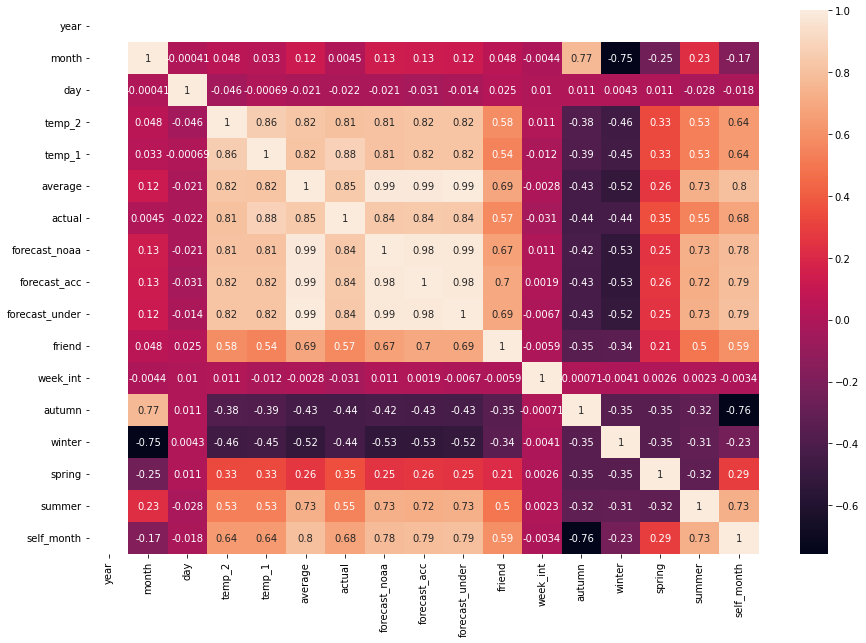

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True)

### 3. Divide en train y test

In [94]:
from sklearn.model_selection import train_test_split

X = df[['temp_1', 'self_month']]
y = df['actual']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [96]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 2)
(70, 2)
(278,)
(70,)


In [ ]:
X = df[['temp_1', 'self_month']]
y = df['actual']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

### 4. Entrena el modelo


In [100]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [97]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [98]:
dtr.score(X_test, y_test)

0.7538666445690886

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [99]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

y_pred = dtr.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 0.7538666445690886
MAE 4.007142857142857
MAPE 0.06605653092009009
MSE 29.09642857142857
RMSE 5.394110544976676


### 6. Representa el árbol de decisión

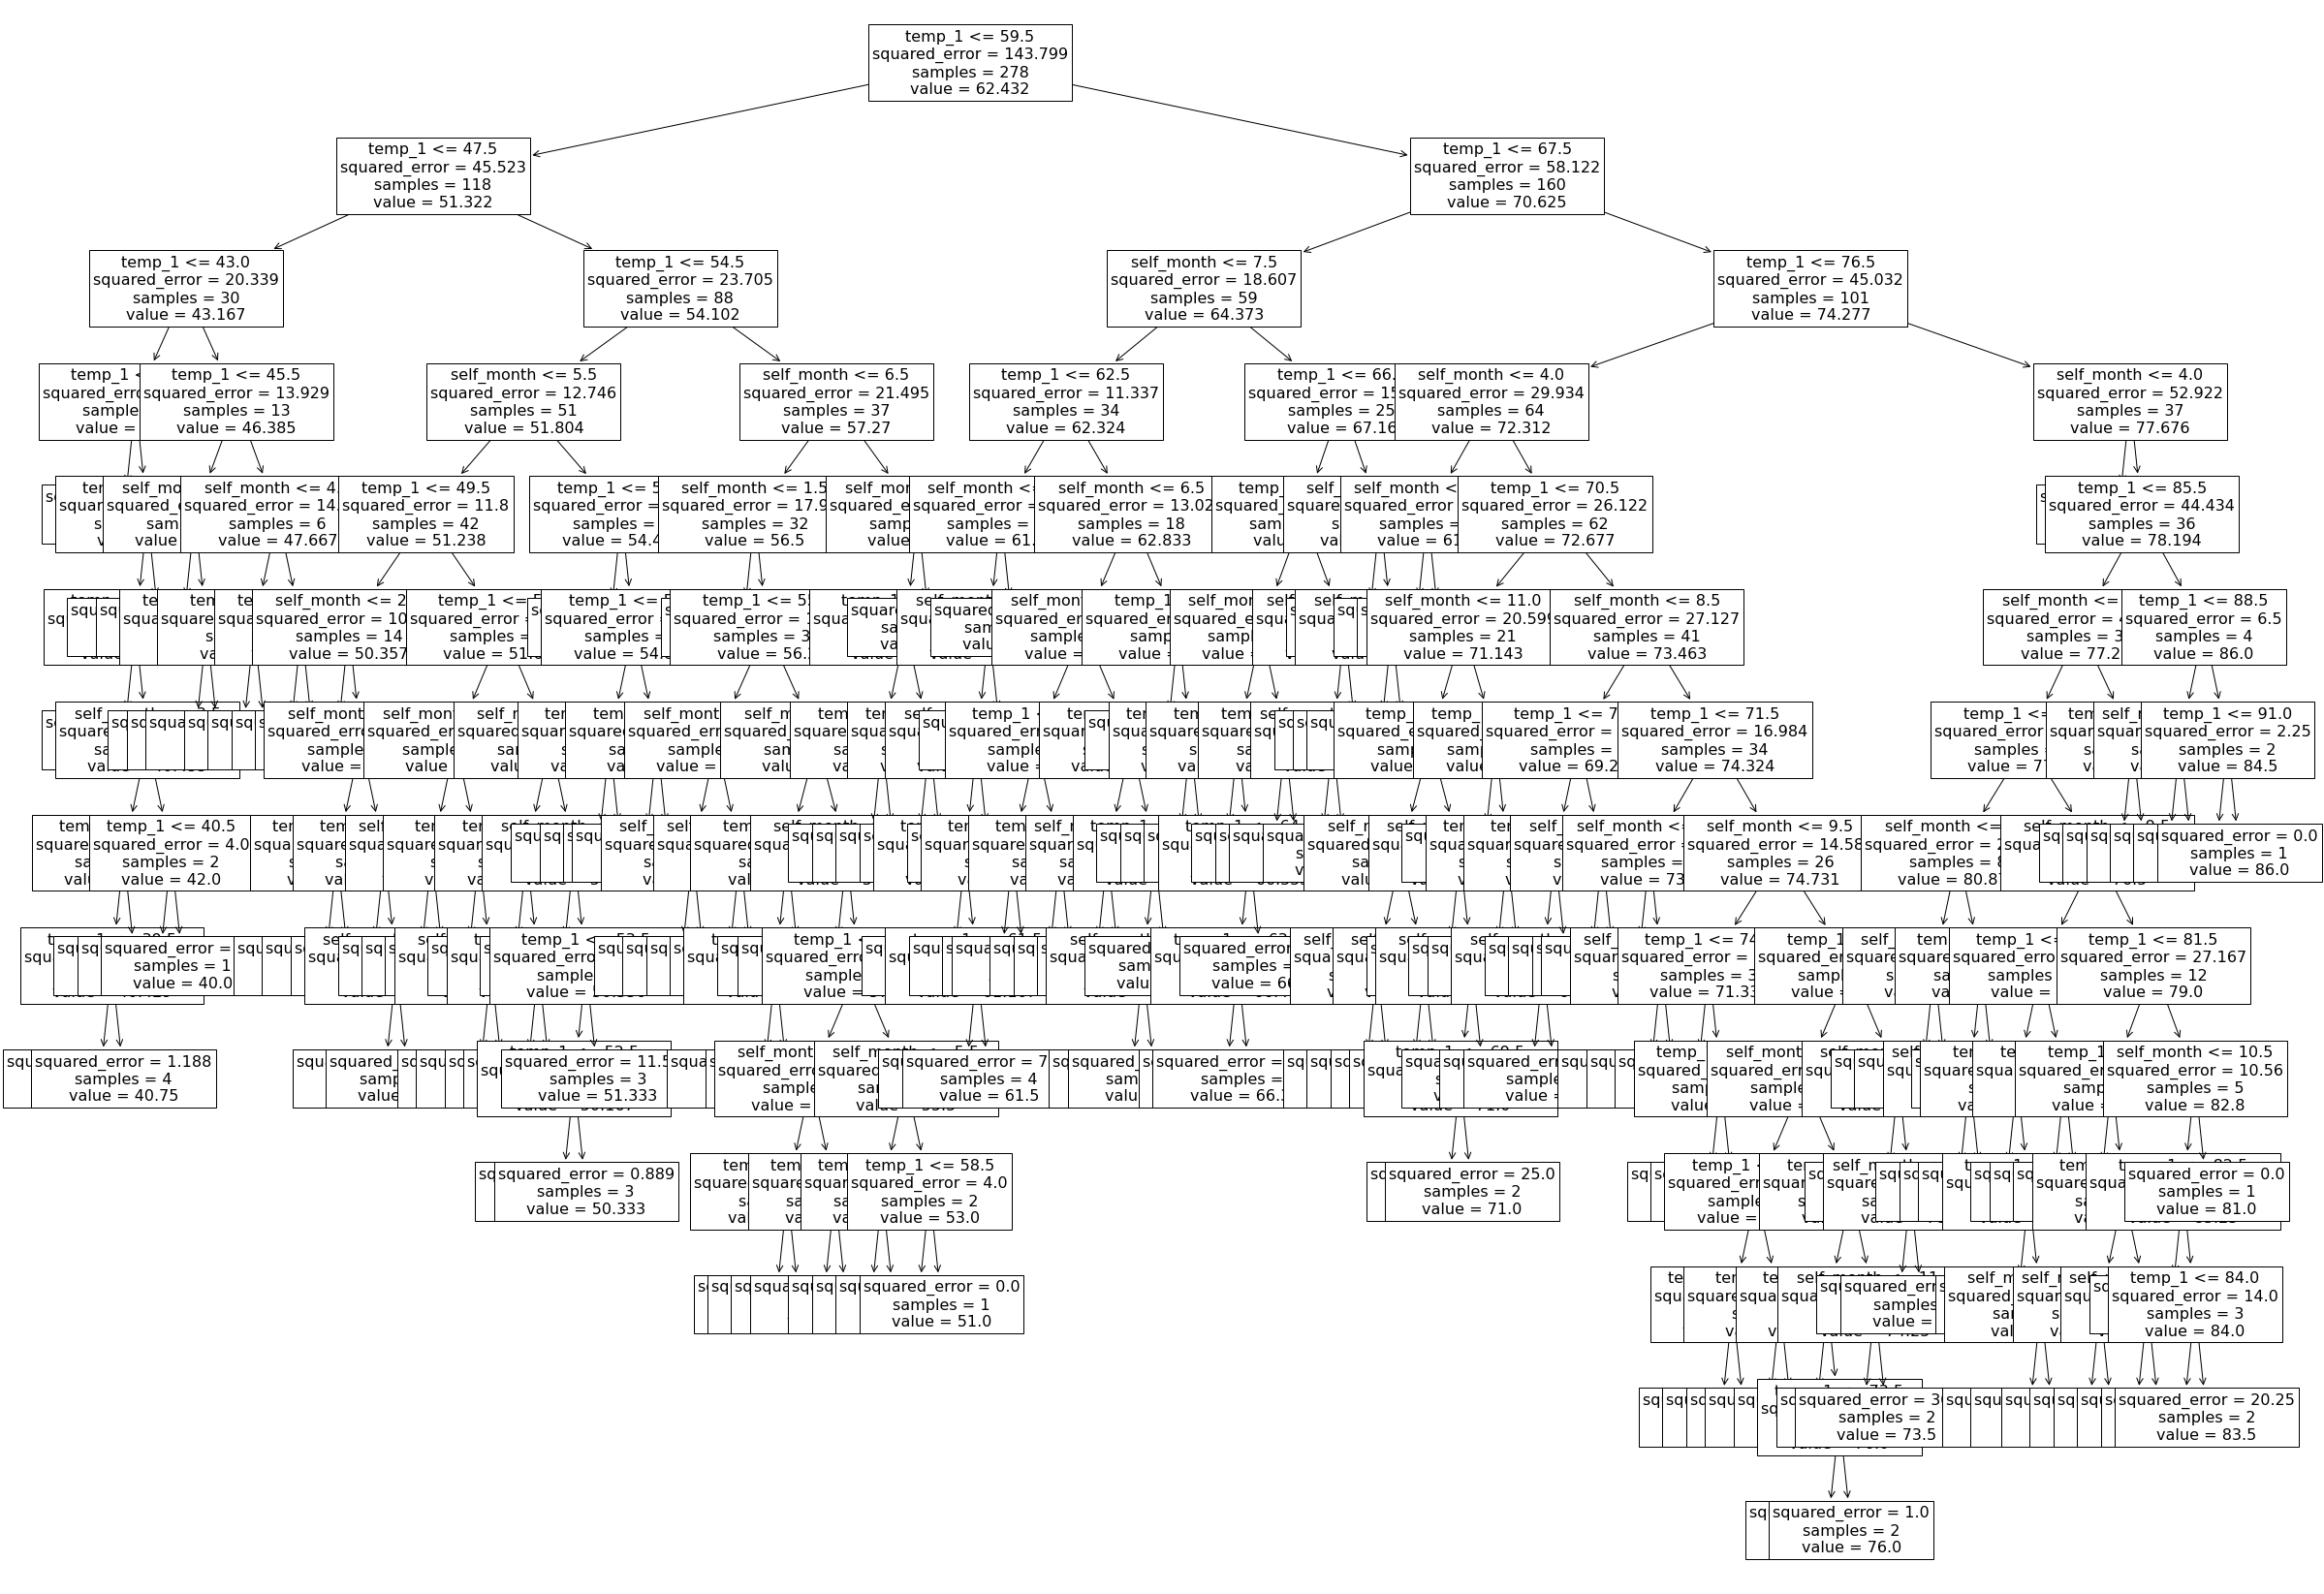

In [103]:
plt.figure(figsize=(40,30))


plot_tree(dtr, feature_names=X_train.columns, class_names='actual', fontsize=16);

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [116]:
dtr2 = DecisionTreeRegressor(max_depth=4, random_state=0)
dtr2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [117]:
dtr2.score(X_train, y_train)

0.8628592699340096

### 8. Vuelve a evaluar tu modelo

In [118]:
y_pred = dtr2.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.7904465166914043
MAE 3.826417233560091
MAPE 0.06242993511627214
MSE 24.772172582249127
RMSE 4.977165115027743


### 9. Vuelve a representar su árbol

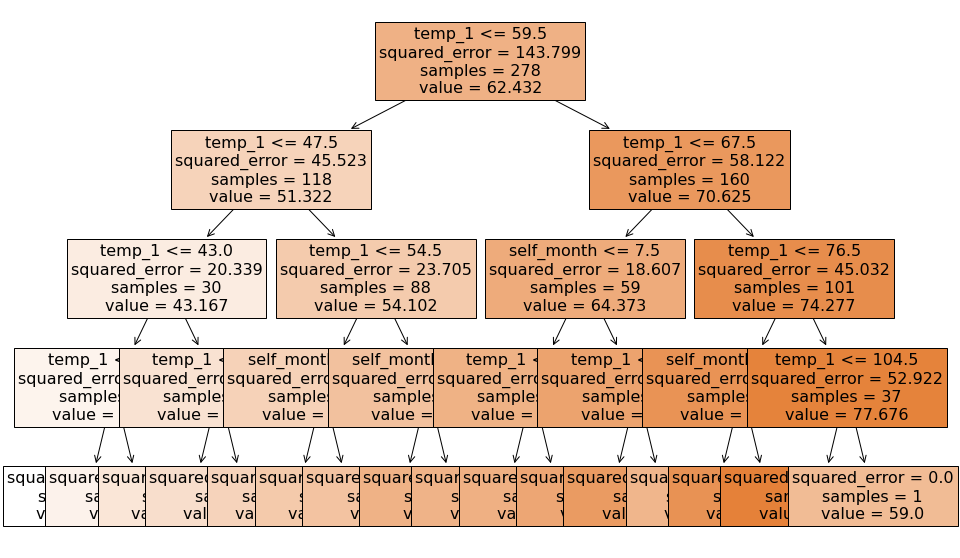

In [120]:
plt.figure(figsize=(15,10))


plot_tree(dtr2, feature_names=X_train.columns, class_names='actual', fontsize=16, filled=True);

### 10. Utiliza un grid search con cross validation.

In [131]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(random_state=0)

parameters = {"max_depth":[2,3,4,5,6,7],
              "criterion": ['squared_error', 'absolute_error'],
              "min_samples_split": [2,4,6,8,10,12],
              "min_samples_leaf": [2,5,10,15],
              "max_features": [1,2]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

In [132]:
dtr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [1, 2],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_absolute_error')

In [133]:
dtr_gs.best_params_

{'criterion': 'absolute_error',
 'max_depth': 6,
 'max_features': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [134]:
dtr_gs.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, max_features=1,
                      min_samples_leaf=2, min_samples_split=10, random_state=0)

In [136]:
abs(dtr_gs.best_score_)

3.8899025974025974

In [138]:
y_pred = dtr_gs.best_estimator_.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.7734739291738095
MAE 3.757142857142857
MAPE 0.06098346447320385
MSE 26.77857142857143
RMSE 5.174801583497809


In [145]:
model = dtr_gs.best_estimator_
model.fit(X, y)

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, max_features=1,
                      min_samples_leaf=2, min_samples_split=10, random_state=0)

In [146]:
model.predict([[40, 9]])

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([67.])

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [152]:
model.feature_importances_

array([0.35714286, 0.64285714])

In [148]:
X_train.columns

Index(['temp_1', 'self_month'], dtype='object')

In [151]:
model

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, max_features=1,
                      min_samples_leaf=2, min_samples_split=10, random_state=0)

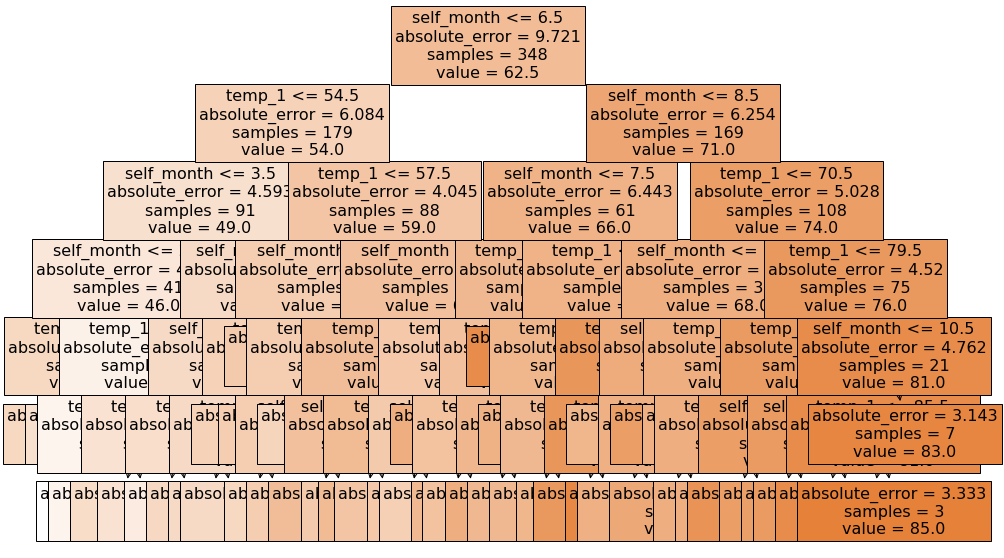

In [149]:
plt.figure(figsize=(15,10))


plot_tree(model, feature_names=X_train.columns, class_names='actual', fontsize=16, filled=True);

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [153]:
df['target'] = np.where(df['actual']>59, 1, 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,self_month,target
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4,0


In [154]:
df['target'].value_counts()

1    204
0    144
Name: target, dtype: int64

<AxesSubplot:>

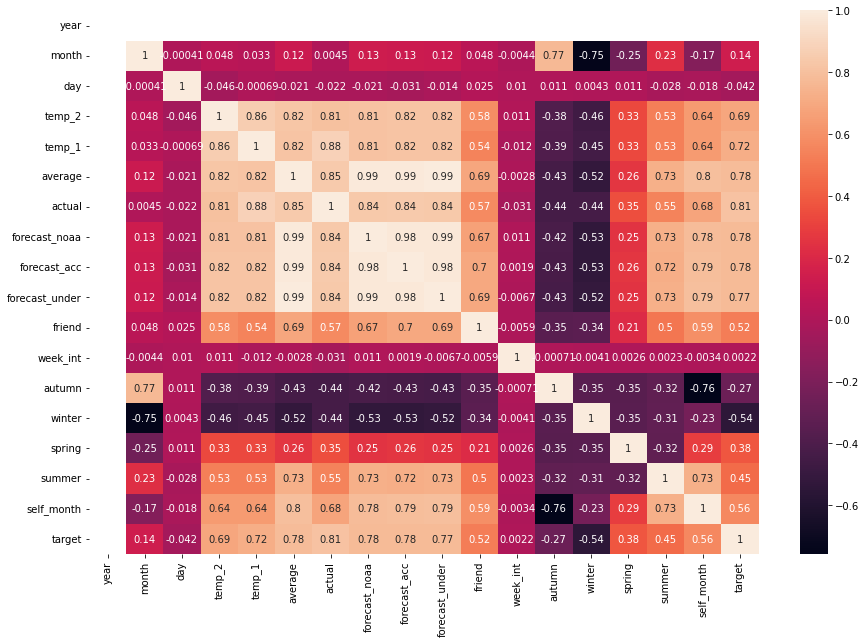

In [157]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [158]:
X = df[['temp_1', 'self_month']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 2)
(70, 2)
(278,)
(70,)


In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

parameters = {"max_depth":[2,3,4,5,6,7],
              "criterion": ['gini', 'entropy'],
              "min_samples_split": [2,4,6,8,10,12],
              "min_samples_leaf": [2,5,10,15],
              "max_features": [1,2]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="accuracy")

In [163]:
dtr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [1, 2],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8, 10, 12]},
             scoring='accuracy')

In [164]:
dtr_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [165]:
dtr_gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=2,
                       min_samples_leaf=2, random_state=0)

In [166]:
dtr_gs.best_score_

0.928051948051948

In [169]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix

In [171]:
y_pred = dtr_gs.best_estimator_.predict(X_test)

print("accuracy_score", accuracy_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))


accuracy_score 0.8571428571428571
recall_score 0.9761904761904762
precision_score 0.82
roc_auc_score 0.8273809523809524


In [173]:
print(confusion_matrix(y_test, y_pred))

[[19  9]
 [ 1 41]]


### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [180]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)

parameters = {"n_estimators":[50,100,150],
              "max_depth":[2,3,4],
              "criterion": ['gini', 'entropy'],
              "min_samples_split": [5,8],
              "min_samples_leaf": [2,3],
              "max_features": [1,2]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="accuracy", n_jobs=-1)

In [181]:
dtr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'max_features': [1, 2],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 8],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [182]:
dtr_gs.best_estimator_

RandomForestClassifier(max_depth=2, max_features=1, min_samples_leaf=2,
                       min_samples_split=5, random_state=0)

In [183]:
y_pred = dtr_gs.best_estimator_.predict(X_test)

print("accuracy_score", accuracy_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))


accuracy_score 0.8428571428571429
recall_score 0.9523809523809523
precision_score 0.8163265306122449
roc_auc_score 0.8154761904761905
